In [1]:
import pandas as pd

pd.set_option("display.width", 1000)
pd.options.mode.chained_assignment = None

from utils.utils import plot_metric

data_retrieval_wikieval = pd.read_csv("../eval_wikieval/pred-wikieval-retrieval-2025-04-27_04_11_05.csv")
data_retrieval_sovanta = pd.read_csv("../eval_sovanta/pred-retrieval-2025-05-25_22_56_07.csv")
data_retrieval = pd.concat([data_retrieval_wikieval, data_retrieval_sovanta], axis=0, ignore_index=True)

data_retrieval = data_retrieval[data_retrieval["retrieval_time"] < 100000]

data_gen_wikieval = pd.read_csv("../eval_wikieval/pred-wikieval-full-2025-05-12_20_33_35.csv")
data_gen_sovanta = pd.read_csv("../eval_sovanta/pred-full-2025-05-27_14_48_21-fixed.csv")
data_gen = pd.concat([data_gen_wikieval, data_gen_sovanta], axis=0, ignore_index=True)

In [2]:
# Check Errors
errors = data_gen[data_gen["is_error"] == True]
print(errors.shape)

(14, 46)


## 1. Embedding Time

In [3]:
group = data_retrieval.groupby(["embed_model"], as_index=False)["embedding_time"].mean()
print(group)

                      embed_model  embedding_time
0                     BAAI/bge-m3       33.615854
1  intfloat/multilingual-e5-large       38.030452


## 2. Retrieval Time

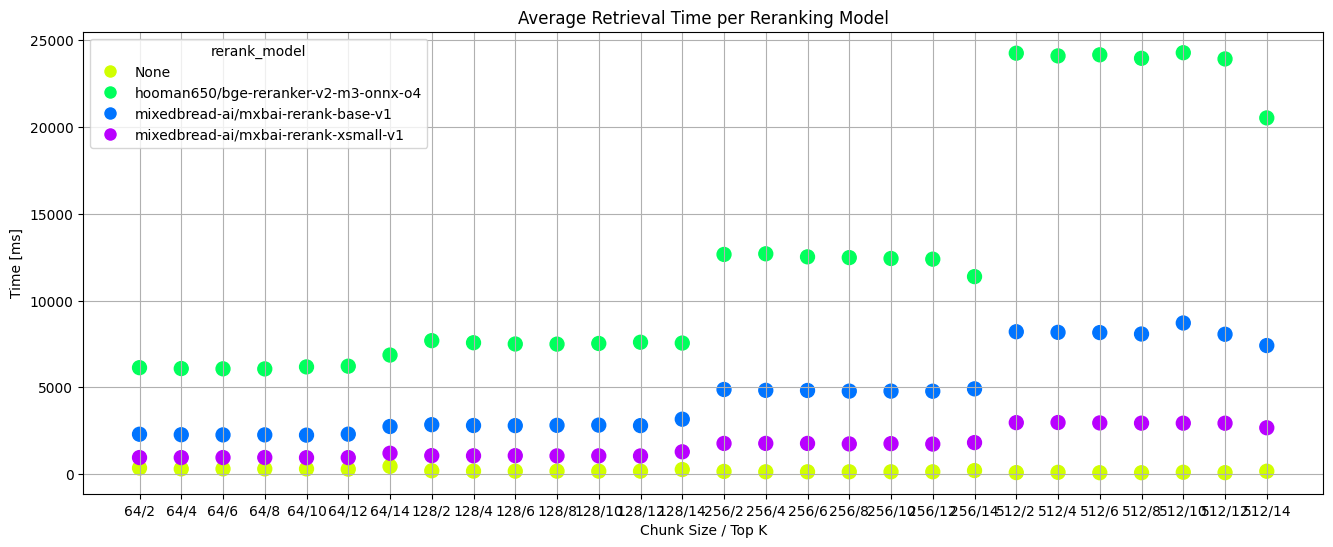

                           rerank_model  mean_retrieval_time
1  hooman650/bge-reranker-v2-m3-onnx-o4         12436.616850
2    mixedbread-ai/mxbai-rerank-base-v1          4533.053651
3  mixedbread-ai/mxbai-rerank-xsmall-v1          1686.235775
0                                  None           189.447944


In [4]:
plot_metric(
    data_retrieval,
    "chunk_top_k",
    "retrieval_time",
    "rerank_model",
    "Chunk Size / Top K",
    "Time [ms]",
    "Average Retrieval Time per Reranking Model",
)

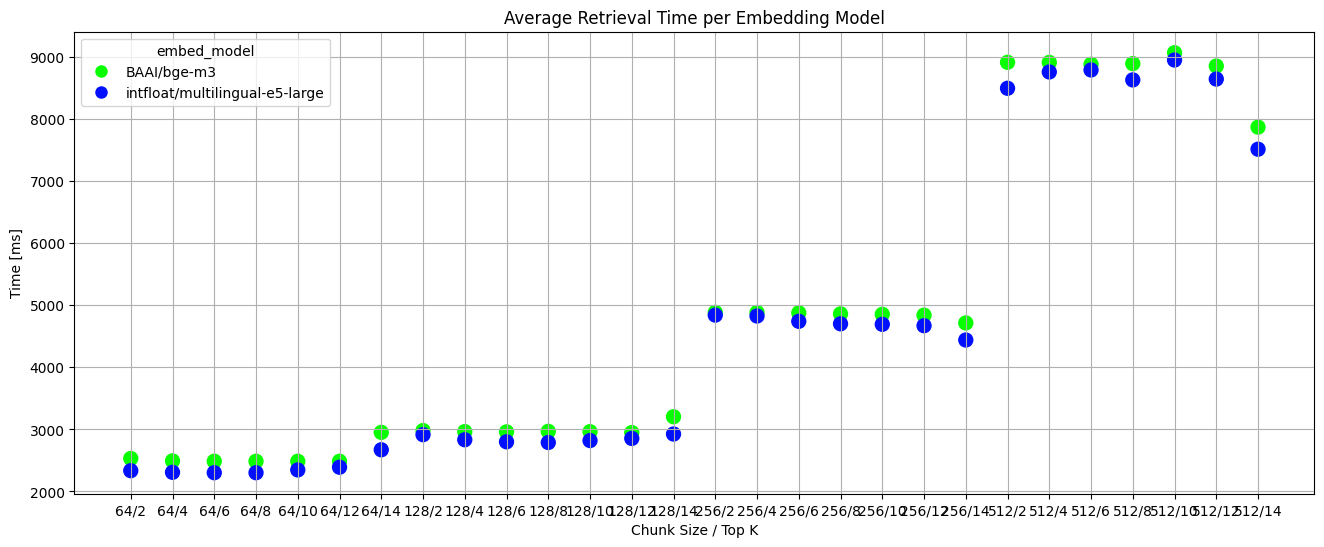

                      embed_model  mean_retrieval_time
0                     BAAI/bge-m3          4793.285055
1  intfloat/multilingual-e5-large          4617.227475


In [5]:
plot_metric(
    data_retrieval,
    "chunk_top_k",
    "retrieval_time",
    "embed_model",
    "Chunk Size / Top K",
    "Time [ms]",
    "Average Retrieval Time per Embedding Model",
)

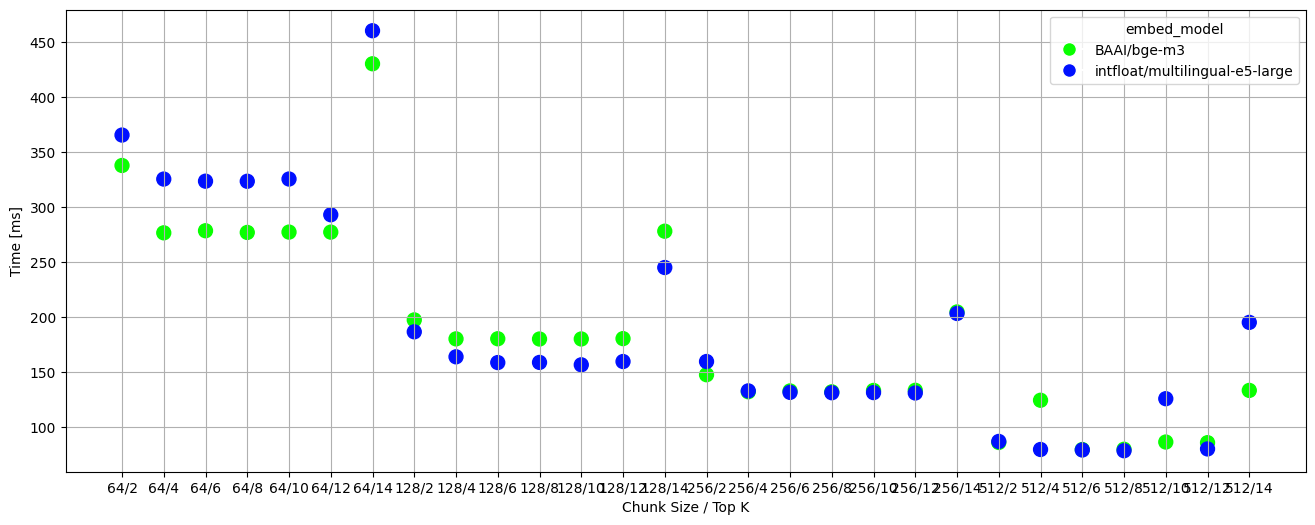

                      embed_model  mean_retrieval_time
1  intfloat/multilingual-e5-large           192.479475
0                     BAAI/bge-m3           186.416414


In [6]:
plot_metric(
    data_retrieval,
    "chunk_top_k",
    "retrieval_time",
    "embed_model",
    "Chunk Size / Top K",
    "Time [ms]",
    "",
    exclude_rerank=True,
)

## 3. Generation Time

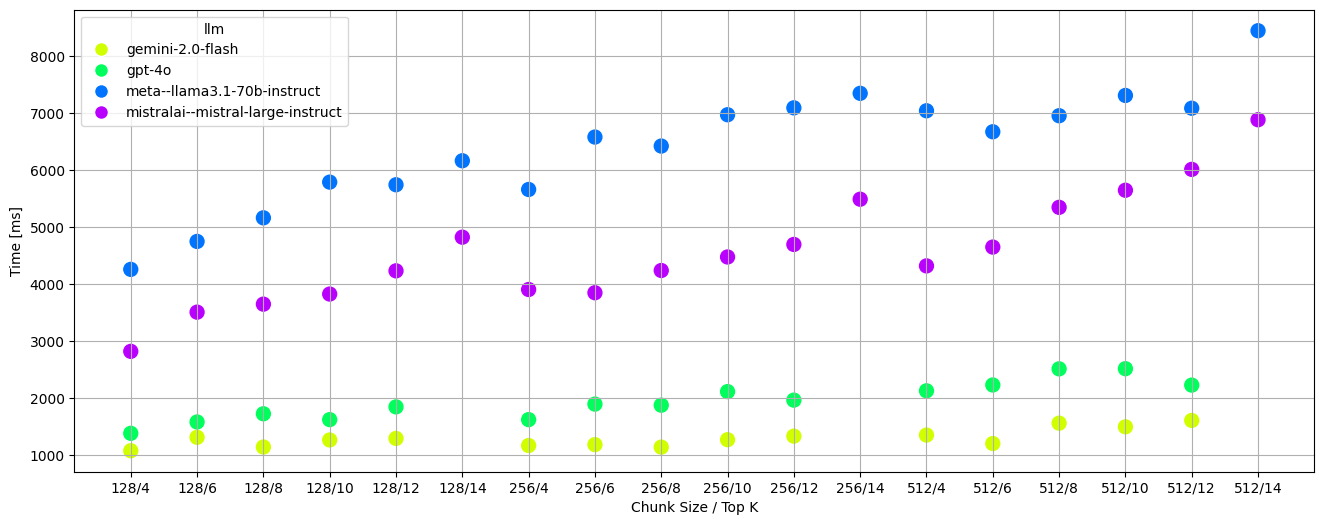

                                 llm  mean_generation_time
2        meta--llama3.1-70b-instruct           6409.264745
3  mistralai--mistral-large-instruct           4572.549847
1                             gpt-4o           1947.216231
0                   gemini-2.0-flash           1291.513475


In [7]:
data_gen_f = data_gen[data_gen["llm"] == "gemini-2.0-flash"]
plot_metric(
    data_gen,
    "chunk_top_k",
    "generation_time",
    "llm",
    "Chunk Size / Top K",
    "Time [ms]",
    "",
)

## 4. Token Usage

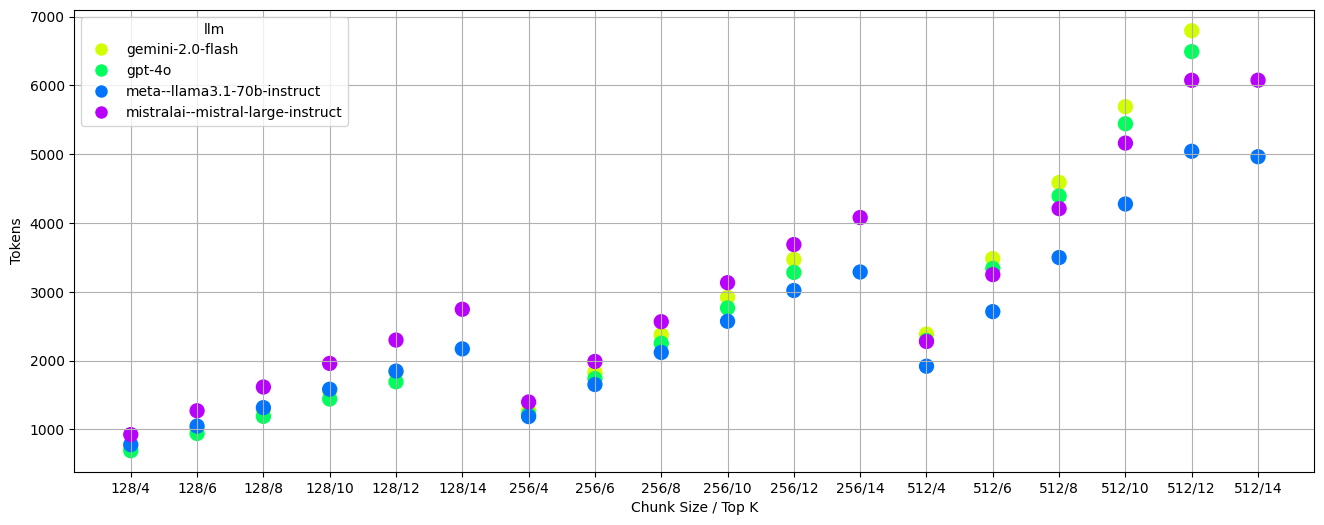

                                 llm  mean_input_tokens
3  mistralai--mistral-large-instruct        3038.862356
0                   gemini-2.0-flash        2748.022000
1                             gpt-4o        2610.248667
2        meta--llama3.1-70b-instruct        2498.516761


In [8]:
plot_metric(data_gen, "chunk_top_k", "input_tokens", "llm", "Chunk Size / Top K", "Tokens", "")

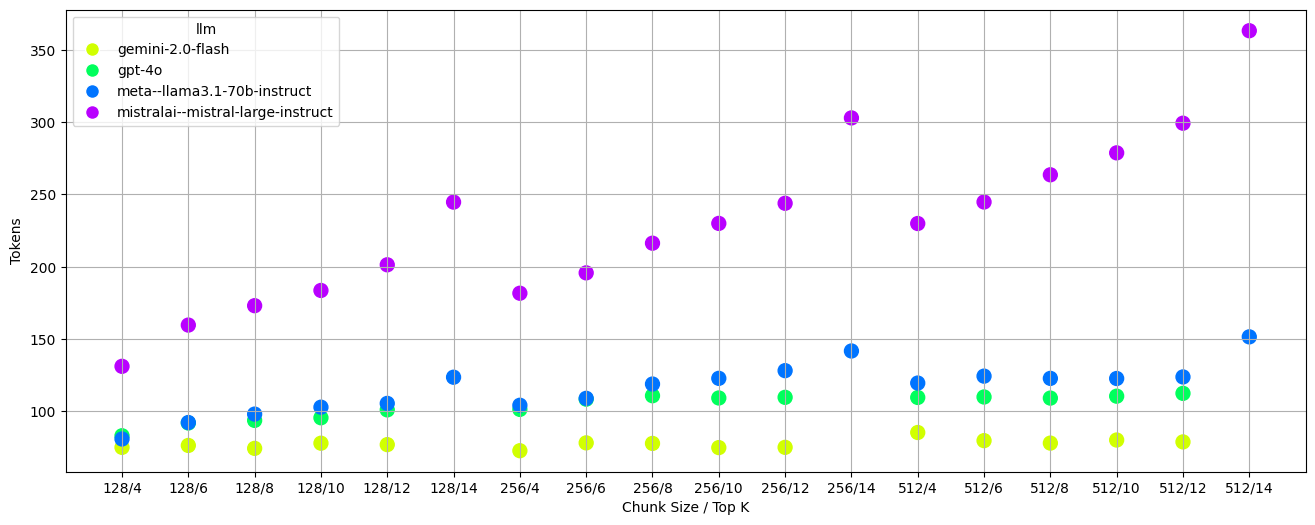

                                 llm  mean_completion_tokens
3  mistralai--mistral-large-instruct              230.205858
2        meta--llama3.1-70b-instruct              116.193801
1                             gpt-4o              103.692667
0                   gemini-2.0-flash               77.361333


In [9]:
data_gen_f = data_gen[data_gen["llm"] == ("gemini-2.0-flash")]
plot_metric(
    data_gen,
    "chunk_top_k",
    "completion_tokens",
    "llm",
    "Chunk Size / Top K",
    "Tokens",
    "",
)